<a href="https://colab.research.google.com/github/Gerardo-Alferez/deploy_streamlit/blob/main/CIFAR10_CNN_SinSolucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Práctica de redes convolucionales (Acción 1)

In [10]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import layers, models, regularizers
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [12]:
from keras.datasets import cifar10

(train_images, train_labels0), (test_images, test_labels0) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Verificando la cantidad de imagenes en el dataset y su dimension, en este caso recibimos 50,000 imagenes de 32x32 x 3 canales de color.


In [13]:
print(train_images.shape)
print(train_labels0.shape)
print(test_images.shape)
print(test_labels0.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Visualiza el formato original de los labels como enteros, este valor es necesario convertirlo a one-hot para poder aplicar una función de pérdida


In [14]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

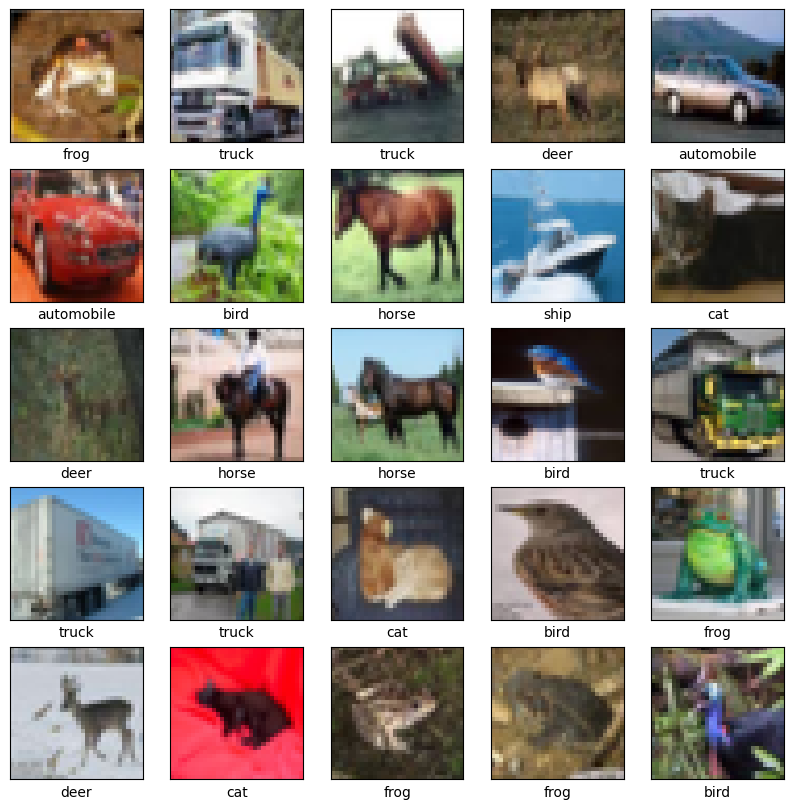

In [15]:
# Visualizamos 25 imagenes del dataset en un grid de 5x5
plt.figure(figsize=[10,10])
for i in range (25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels0[i][0]])
plt.show()

In [16]:
from keras.utils import to_categorical  # Asegúrate de tener esta línea antes

# Convertimos los píxeles a tipo float
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalización, dividiendo por 255 para llevar los valores entre 0 y 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Se codifican las etiquetas como one-hot
num_classes = 10
train_labels = to_categorical(train_labels0, num_classes)
test_labels = to_categorical(test_labels0, num_classes)

#### Ejercicio 1:

¿Cuál de las siguientes opciones es idónea como última capa de tu modelo?  

Escribe tu respuesta en el espacio indicado en la siguiente celda.

A:
```
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
```

B:
```
model.add(layers.Dense(10, activation='relu'))
```

C:
```
model.add(layers.Dense(32, activation='softmax'))
```

D:
```
model.add(layers.Dense(10, activation='softmax'))
```


In [17]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

## Ejercicio 1:
# Inserta en la siguiente línea la opción que consideres correcta.
# model.add(...)

model.add(layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

### Entrenamiento del modelo

In [18]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

### Ejercicio 2:

Modifica la siguiente línea para entrenar el modelo por 20 épocas.

In [ ]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=1, validation_data=(test_images, test_labels))

In [19]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.3223 - loss: 2.0948 - val_accuracy: 0.5244 - val_loss: 1.2860
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5600 - loss: 1.2326 - val_accuracy: 0.6577 - val_loss: 0.9670
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6469 - loss: 0.9975 - val_accuracy: 0.6938 - val_loss: 0.8717
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6923 - loss: 0.8789 - val_accuracy: 0.7185 - val_loss: 0.7915
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7182 - loss: 0.8016 - val_accuracy: 0.7058 - val_loss: 0.8416
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7395 - loss: 0.7460 - val_accuracy: 0.7504 - val_loss: 0.7245
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7577 - loss: 0.7047 - val_accuracy: 0.7857 - val_loss: 0.6183
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7708 - loss: 0.6632 - val_accurac

### Visualización del proceso de entrenamiento.

Aquí puedes ver si el entrenamiento está disminuyendo la pérdida o no. En cuyo caso puedes decidir aplicar técnicas para optimizar el mismo como EarlyStopping o LR find.

Text(0.5, 1.0, 'Loss Curves')

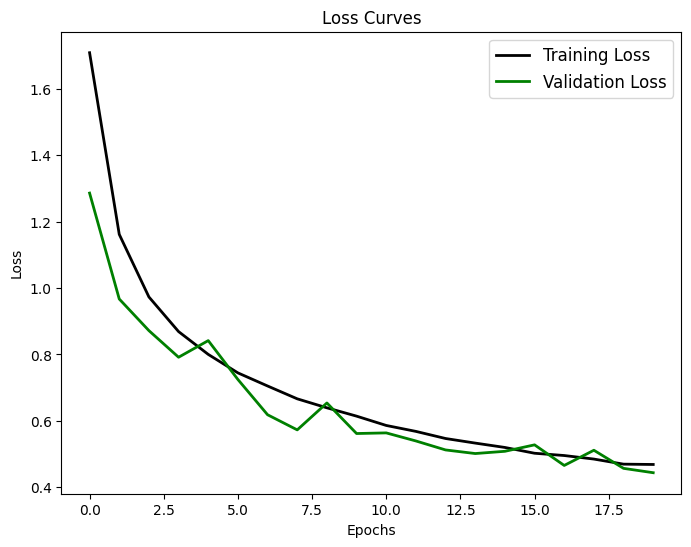

In [21]:
# Loss curve
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Del mismo modo puedes observar la calidad de la predicción en el conjunto de test. Conforme avanzan las épocas, la exactitud de la predicción (Accuracy) se va incrementando. ¿Te parece que más épocas ayudarían al modelo?

Text(0.5, 1.0, 'Accuracy Curves')

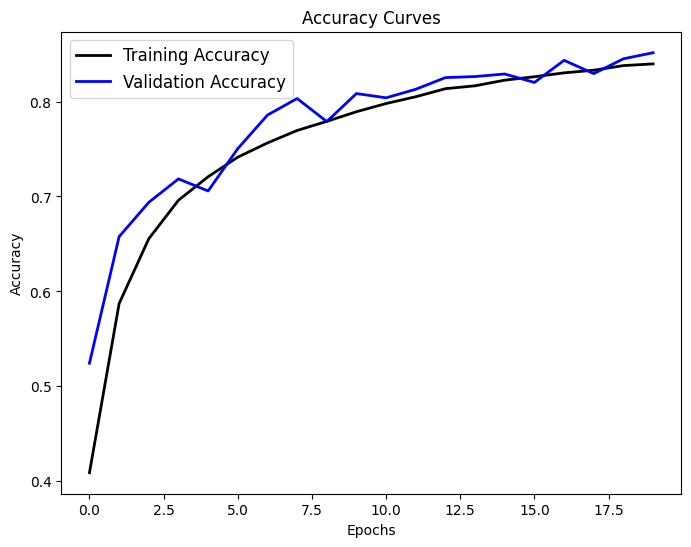

In [22]:
# Curva de exactitud (accuracy)
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [23]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
[[1.9786617e-05 9.0685171e-06 5.1602132e-05 ... 1.3280383e-05
  5.1874995e-05 1.2172843e-06]
 [4.8675493e-06 6.9359038e-04 1.7271148e-09 ... 9.5460062e-10
  9.9929988e-01 1.5968277e-06]
 [4.7836997e-04 1.6736049e-03 1.6796551e-07 ... 2.3898477e-07
  9.9777967e-01 6.6149194e-05]
 ...
 [5.7794557e-07 8.2127110e-07 7.7124295e-04 ... 1.0187190e-03
  6.4643214e-06 1.1877733e-06]
 [3.7137780e-02 9.2665106e-01 1.7654707e-03 ... 2.3923304e-03
  2.0212210e-03 2.3577197e-03]
 [1.2172292e-07 5.1136630e-07 3.3252957e-06 ... 9.9979943e-01
  2.2757613e-08 3.3744286e-08]]
[3 8 8 ... 5 1 7]


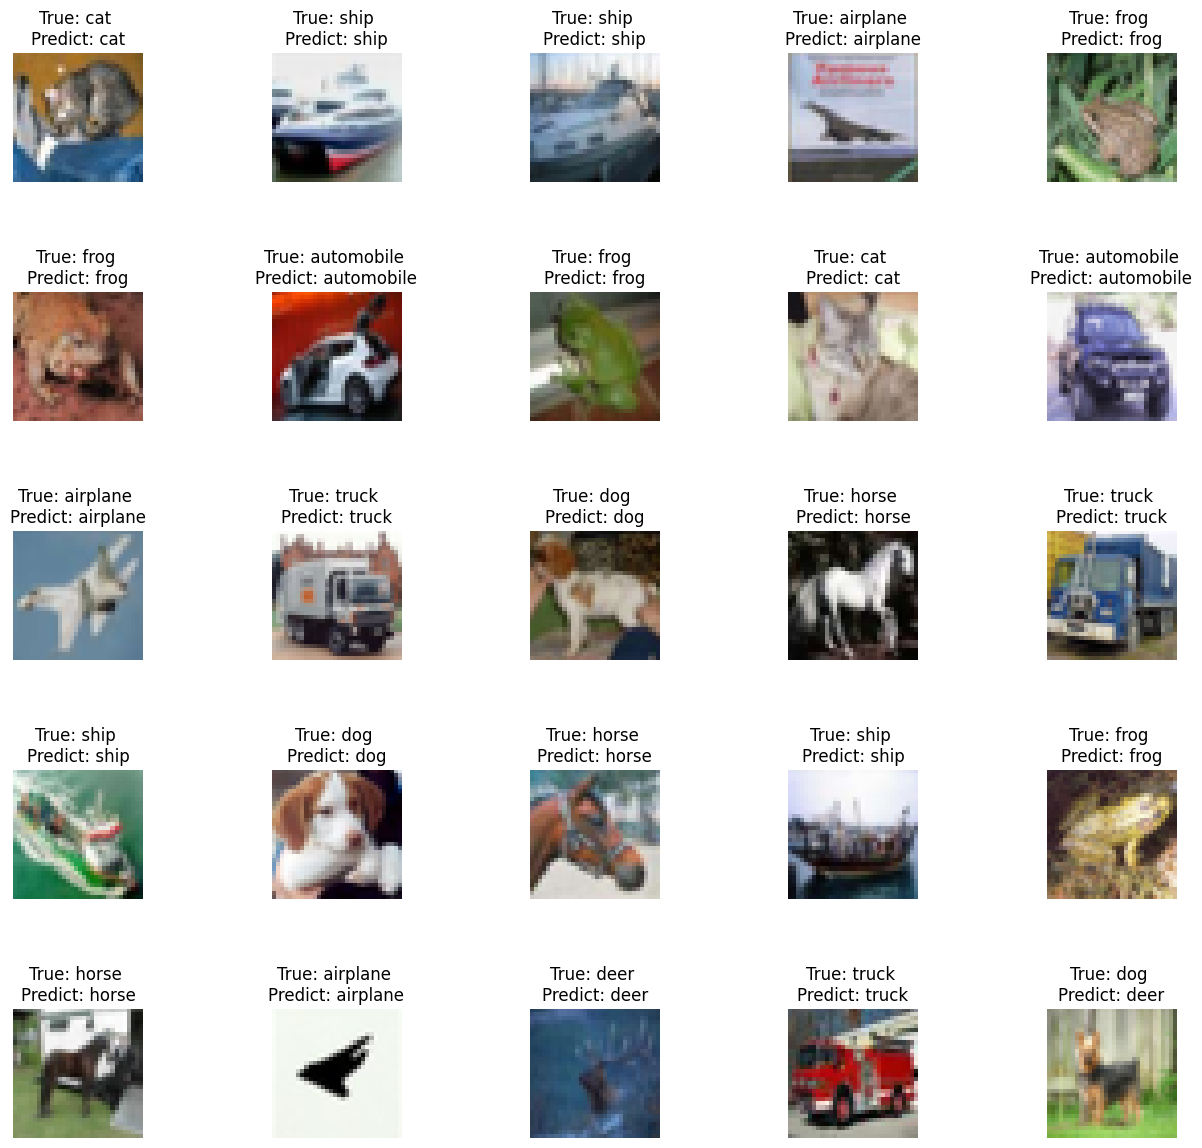

In [24]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

## Generación de matriz de confusión

### Ejercicio

Ajusta el siguiente código para obtener la matriz de confusión del modelo original.

In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#cm=confusion_matrix(test_labels.argmax(axis=1), pred.argmax(axis=1))
#print("Classification Report:\n")
#cr=classification_report(test_labels.argmax(axis=1), pred.argmax(axis=1), target_names=class_names)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

# Obtener predicciones del modelo
pred = model.predict(test_images)

# Convertir etiquetas y predicciones de one-hot a clase (número entero)
y_true = test_labels.argmax(axis=1)
y_pred = pred.argmax(axis=1)

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
print("Matriz de Confusión:\n")
print(cm)

# Lista de nombres de clases de CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Reporte de clasificación
print("\nReporte de Clasificación:\n")
cr = classification_report(y_true, y_pred, target_names=class_names)
print(cr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Matriz de Confusión:

[[887   8  16  19   4   0   4  10  32  20]
 [  3 922   0   5   2   2   5   1  15  45]
 [ 53   1 769  38  47  37  31  15   4   5]
 [ 12   0  42 743  32 110  33  15   7   6]
 [ 16   1  33  48 804  24  29  39   5   1]
 [  5   0  30 137  20 768  14  26   0   0]
 [  6   1  14  41  16   6 906   6   3   1]
 [ 14   0  10  35  18  25   3 893   2   0]
 [ 65  10   4   7   1   1   3   0 900   9]
 [ 12  39   2   6   0   2   1   3  13 922]]

Reporte de Clasificación:

              precision    recall  f1-score   support

    airplane       0.83      0.89      0.86      1000
  automobile       0.94      0.92      0.93      1000
        bird       0.84      0.77      0.80      1000
         cat       0.69      0.74      0.71      1000
        deer       0.85      0.80      0.83      1000
         dog       0.79      0.77      0.78      1000
        frog       0.88      0.91      0.89      1000
       horse       0.89      0.89      0.89  

Referencia:

https://www.kaggle.com/code/ektasharma/simple-cifar10-cnn-keras-code-with-88-accuracy/notebook

